In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from math import sqrt


# Part 2: Additional Analysis on Stork Data

*Table of Contents*
1.1. Regression Models for Number of Births
   * 1.1.1. Linear Regression Model to explain Birthrate, with Storks as a predictor
   * 1.1.2. Linear Regression Model to explain Birthrate, with Humans (population) as a predictor

1.2. Bootstrapping to estimate the distribution of R2 parameters for the two Linear Regression Models
   * 1.2.1. Confidence in models in explaining Birthrate Variability

2.1. Regression Models for Storks
   * 2.1.1. Linear Regression Model that predicts the number of Storks, with Area as a predictor
   * 2.1.2. Linear Regression Model that predicts the number of Storks, with PopulationDensity and SuitableArea as predictors

2.2. Bootstrapping to estimate the difference in Root Mean Squared (RMSE) between the predicted and actual values of the two Linear Regression Models
   * 2.2.1. Confidence in Models in predicting the Number of Storks




## 1.1. Regression Models for Number of Births

This sections focuses on the generation of two regression models that explains the variability in the number of births. The first regression model uses Storks as a predictor while the second model uses Humans (population of the area) as a predictor to explain birth rates. Both models are visualised on a scatter plot, which indicates how good the linear regression models are in explaining variability of Birthrate seen in the Storks dataset.

In [198]:
storks = pd.read_csv("storks.csv")
storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


The R2 value of the Linear Regression Model is 0.38473
The coefficient for this Regression Model is 0.02879


Text(0.5, 0.98, 'A Plot showing the fit of the Linear Regression Model in explaining Birthrate with Storks as a predictor')

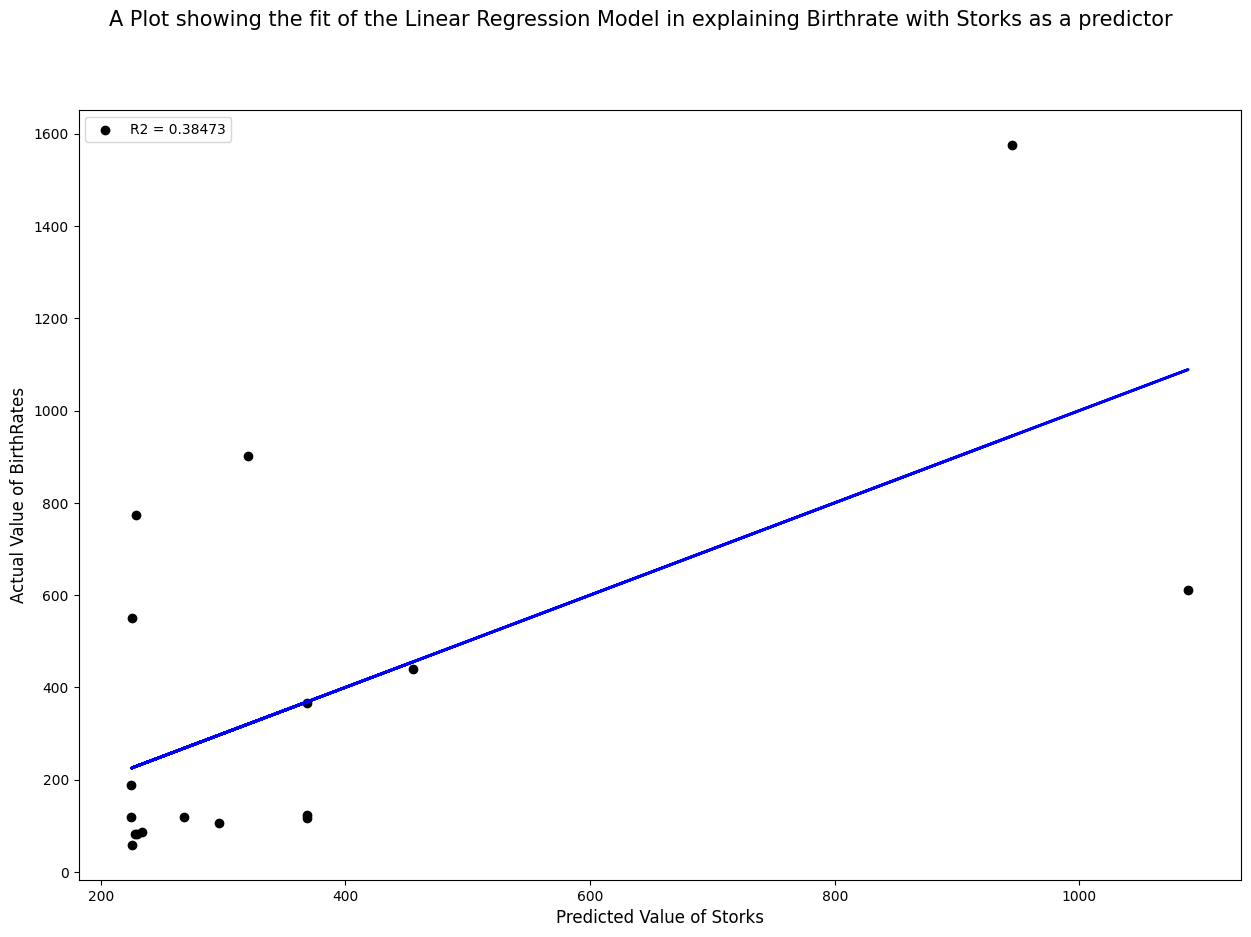

In [199]:
y_birth = storks.BirthRate
x_stork = np.column_stack(storks.Storks).reshape(-1,1)
reg_stork = LinearRegression().fit(x_stork, y_birth)
y_hat_stork = reg_stork.predict(x_stork)

r2_stork = reg_stork.score(x_stork, y_birth).round(5)
coef = reg_stork.coef_[0].round(5)
print(f"The R2 value of the Linear Regression Model is {r2_stork}")
print(f"The beta coefficient for this Regression Model is {coef}")


fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat_stork, y_birth,  color='black', label = f"R2 = {r2_stork}")
a.plot(y_hat_stork, y_hat_stork, color='blue', linewidth=2)

a.legend(loc= 'upper left')
a.set_xlabel('Predicted Value of Storks', size = 12)
a.set_ylabel('Actual Value of BirthRates', size = 12)
fig.suptitle("A Plot showing the fit of the Linear Regression Model in explaining Birthrate with Storks as a predictor", size = 15)

### 1.1.1. Linear Regression Model to explain Birthrate, with Storks as a predictor

The figure shows the fit of the linear regression model in explaining Birthrate, with Storks as a predictor. The blue line shows how well the model is fitted; the closer the points are to the blue line, the better the predictor (Storks) is at explaining Birthrate. As evident above, a few points are close to the blue line while most of the points are scattered further away from the line and therefore the linear regression model is not the best at explaining the variability of birthrate. Furthermore, the R2 value is 0.38 which means that Storks are slightly weak predictor in explaining variability of Birthrate in this sample dataset.

The R2 value of the Linear Regression Model is 0.72456
The coefficient for this Regression Model is 14.83444


Text(0.5, 0.98, 'A Plot showing the fit of the Linear Regression Model in explaining Birthrate with Humans (population) as a predictor')

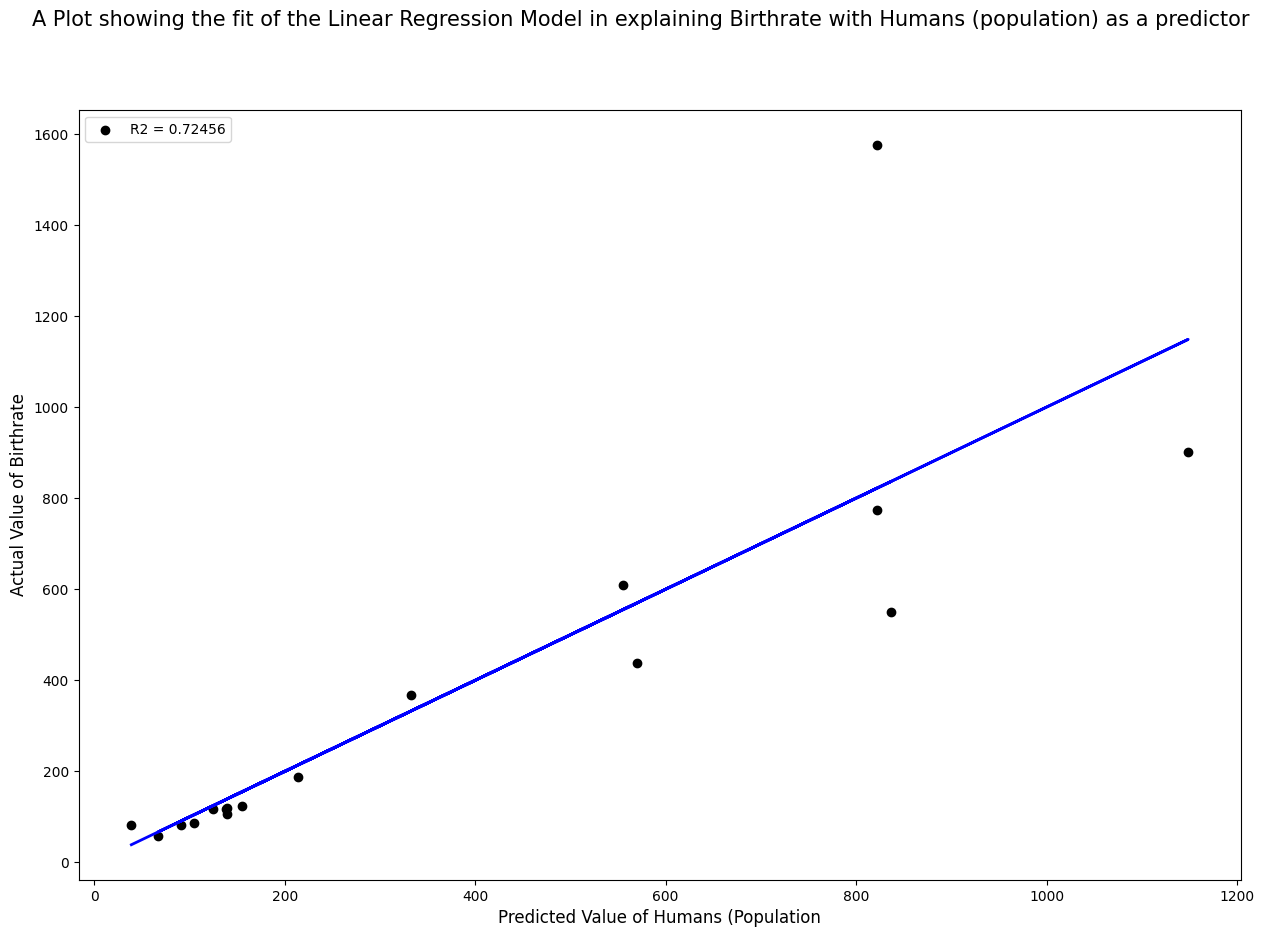

In [200]:
y_birth = storks.BirthRate
x_human = np.column_stack(storks.Humans).reshape(-1, 1)
reg_human = LinearRegression().fit(x_human, y_birth)
y_hat_human = reg_human.predict(x_human)

r2_human = reg_human.score(x_human, y_birth).round(5)
coef_human = reg_human.coef_[0].round(5)
print(f"The R2 value of the Linear Regression Model is {r2_human}")
print(f"The beta coefficient for this Regression Model is {coef_human}")

fig, a = plt.subplots(1, 1, figsize=(15, 10))
a.scatter(y_hat_human, y_birth, color='black', label = f"R2 = {r2_human}")
a.plot(y_hat_human, y_hat_human, color='blue', linewidth=2)

a.legend(loc= 'upper left')
a.set_xlabel('Predicted Value of Humans (Population', size = 12)
a.set_ylabel('Actual Value of Birthrate', size = 12)
fig.suptitle("A Plot showing the fit of the Linear Regression Model in explaining Birthrate with Humans (population) as a predictor", size = 15)

### 1.1.2. Linear Regression Model to explain Birthrate, with Humans (population) as a predictor

The figure shows the fit of the linear regression model in explaining Birthrate, with Humans (population) as a predictor. The blue line shows how well the model is fitted; the closer the points are to the blue line, the better the predictor (Humans (population)) is at explaining Birthrate. The figure highlights that most of the points are fitted by the regression model, with a few that are slightly further away from the blue line, which suggests that Humans (population) are a good predictor of Birthrate for each country. This is more logical as generally the higher the population in an area, the higher the Birthrate. Additionally, the R2 value for this model is 0.72 which means that Humans (population) are a pretty strong predictor to explain variability in Birthrate, especially in relation to the previous regression model that used Storks.

## 1.2. Bootstrapping to estimate the distribution of R2 parameters for the two Linear Regression Models

This section uses a bootstrap function to resample the data and remodel the previous two Linear Regression Models. In doing so, the data is fitted over and over again generating various models with various R2 parameters. A difference of the R2 parameters is computed and shown below - this is also displayed as a histogram. Finally, appropriate confidence intervals are chosen to explain whether one model may be better than the other in explaining the variability in Birthrate.

In [201]:
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))

    for i in range(0, repeats):
        result.iloc[i] = func(resample(data))
    return result


     A Histogram showing the distribution of differences between the R2 parameter of both models
0                                             0.337442                                          
1                                             0.406609                                          
2                                             0.889289                                          
3                                             0.100953                                          
4                                             0.932532                                          
..                                                 ...                                          
495                                           0.464818                                          
496                                           0.142660                                          
497                                           0.441703                                          
498                           

Text(0, 0.5, 'Frequency of distribution')

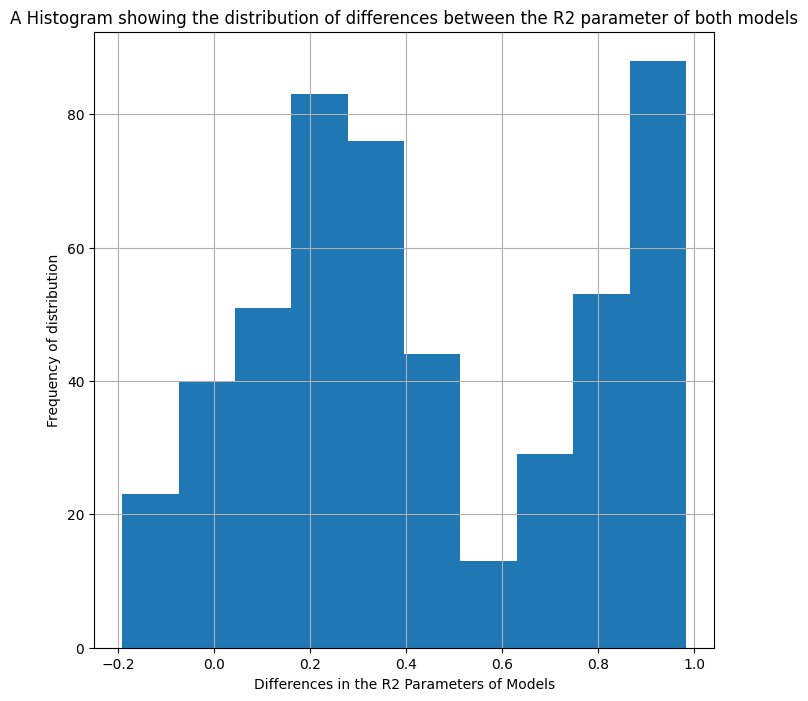

In [202]:
def doRegression(storks):
    y_birth = storks.BirthRate
    x_stork = np.column_stack(storks.Storks).reshape(-1,1)
    reg_stork    = LinearRegression().fit(x_stork, y_birth)
    stork_score = reg_stork.score(x_stork, y_birth)


    y_birth = storks.BirthRate
    x_human = np.column_stack(storks.Humans).reshape(-1, 1)
    reg_human = LinearRegression().fit(x_human, y_birth)
    human_score = reg_human.score(x_human, y_birth)

    diff = human_score - stork_score
    return diff


difference = doRegression(storks)
bstrap = bootstrapC(storks, ["A Histogram showing the distribution of differences between the R2 parameter of both models"], 500, doRegression)
print(bstrap)
_ = bstrap.hist(figsize=(8,8), bins = 10)
plt.xlabel("Differences in the R2 Parameters of Models")
plt.ylabel("Frequency of distribution")

In [203]:
print("The difference in both models is %4.1f, with 90%% CI from %4.1f to %4.1f" %
      (difference, bstrap["A Histogram showing the distribution of differences between the R2 parameter of both models"].quantile(0.05), bstrap["A Histogram showing the distribution of differences between the R2 parameter of both models"].quantile(0.95)))
print("The difference in both models is %4.1f, with 85%% CI from %4.1f to %4.1f" %
      (difference, bstrap["A Histogram showing the distribution of differences between the R2 parameter of both models"].quantile(0.075), bstrap["A Histogram showing the distribution of differences between the R2 parameter of both models"].quantile(0.925)))
print("The difference in both models is %4.1f, with 80%% CI from %4.1f to %4.1f" %
      (difference, bstrap["A Histogram showing the distribution of differences between the R2 parameter of both models"].quantile(0.1), bstrap["A Histogram showing the distribution of differences between the R2 parameter of both models"].quantile(0.9)))

The difference in both models is  0.3, with 90% CI from -0.1 to  0.9
The difference in both models is  0.3, with 85% CI from -0.0 to  0.9
The difference in both models is  0.3, with 80% CI from  0.0 to  0.9


### 1.2.1. Confidence in models in explaining Birthrate Variability

Confidence intervals allows one to be certain whether the regression models used above reflects the true pattern seen in the wider population. In other words, how certain we can be that the models truly explain variability of birthrate in a wider population. If the confidence intervals ranges between positive values, we can be sure that the human model will have a bigger R2 parameter than the stork model, and hence will be better at explaining variability of birthrate. Likewise, if negative, the stork model is better than the human model.

Listed above are the different confidence intervals at which the difference of both models lies in. At 90%, the confidence interval ranges its upper and lower bounds between negative and positive values, which means that we cannot be certain of which model is better than the other. However, at 80% confidence interval, we can be confident that the human model is better at explaining the variability in the number of births than the stork model.

## 2.1. Regression Models for Storks

This sections focuses on the generation of two regression models that predicts the number of Storks. The first regression model uses Area as a predictor while the second model uses Population Density (calculated by dividing Humans by Area) and Suitable Area (calculated by dividing Area by SuitableAreaPercent) as a predictor to explain Stork numbers. Both models are visualised on a scatter plot, which indicates how good the linear regression models are in predicting the number of Storks in the dataset.

The R2 value of the Linear Regression Model is 0.33564
The coefficient for this Regression Model is 0.02331


Text(0.5, 0.98, 'A Plot showing the fit of the Linear Regression Model in explaining Stork Pairs with Area as a predictor')

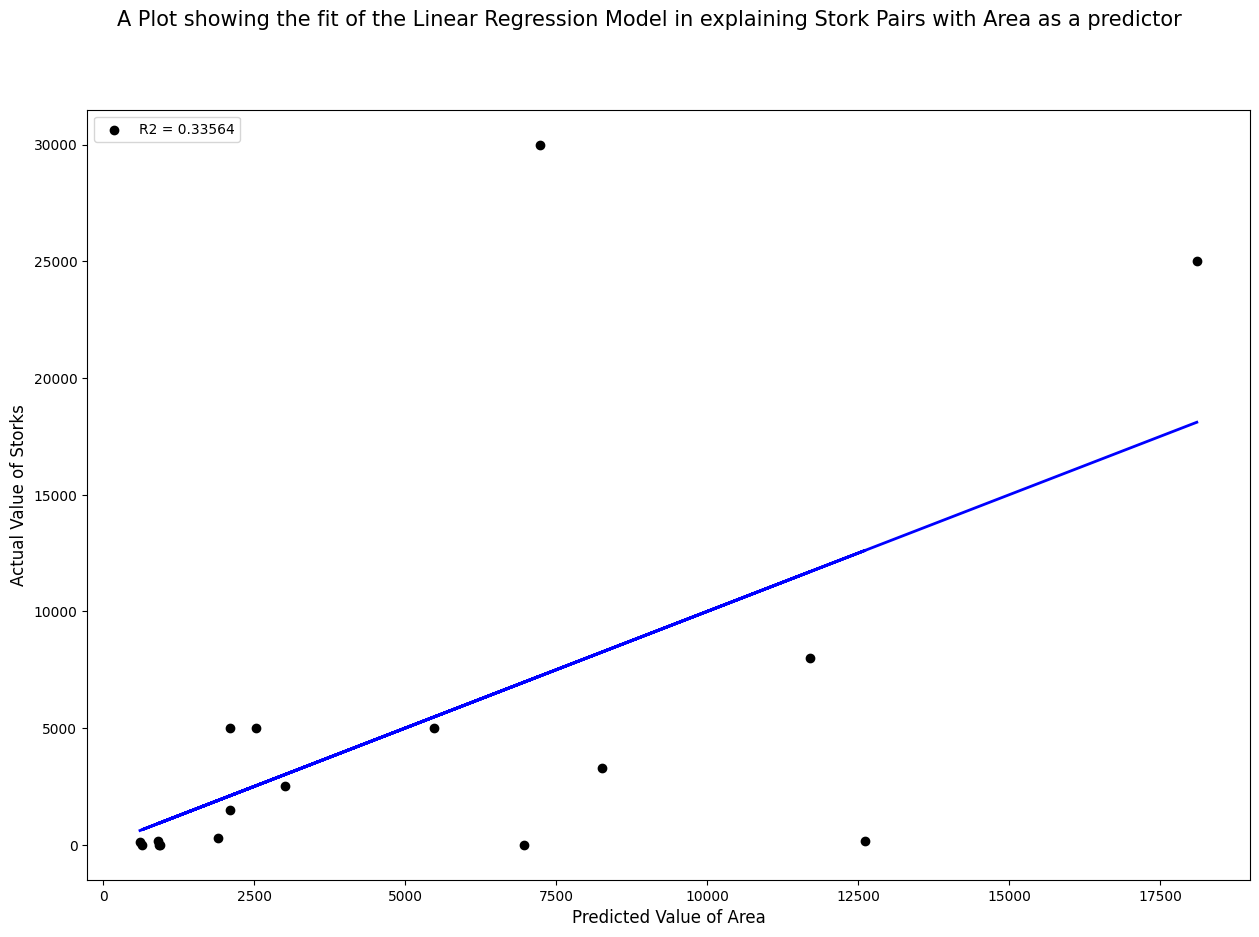

In [204]:
y_stork = storks.Storks
x_area = np.column_stack(storks.Area).reshape(-1,1)
reg_area = LinearRegression().fit(x_area, y_stork)
y_hat_area = reg_area.predict(x_area)

r2_area = reg_area.score(x_area, y_stork).round(5)
coef_area = reg_area.coef_[0].round(5)
print(f"The R2 value of the Linear Regression Model is {r2_area}")
print(f"The beta coefficient for this Regression Model is {coef_area}")


fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat_area, y_stork,  color='black', label = f"R2 = {r2_area}")
a.plot(y_hat_area, y_hat_area, color='blue', linewidth=2)

a.legend(loc = "upper left")
a.set_xlabel('Predicted Value of Area', size = 12)
a.set_ylabel('Actual Value of Storks', size = 12)
fig.suptitle("A Plot showing the fit of the Linear Regression Model in explaining Stork Pairs with Area as a predictor", size = 15)

### 2.1.1. Linear Regression Model that predicts the number of Storks, with Area as a predictor

The figure shows the fit of the linear regression model in predicting the number of Storks, with Area as a predictor. The blue line shows how well the model is fitted; the closer the points are to the blue line, the better the predictor (Area) is at predicting the number of Storks. The figure shows that a half of the datapoints are close to the blue line, while half are spread away from it. In conjunction with the R2 value of 0.34, one can conclude that this regression model that uses Area as a predictor is not the best for predicting the number of Storks in each country.

In [206]:
storks["SuitableAreaPercent"] = storks.SuitableAreaPercent / 100
storks["Humans"] = storks.Humans * 10**6

In [207]:
storks["SuitableArea"] = storks.Area * storks.SuitableAreaPercent
storks["PopulationDensity"] = storks.Humans / storks.Area
storks

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,SuitableArea,PopulationDensity
0,Albania,28750,100,3200000.0,83,0.5568,16008.000,111.304348
1,Austria,83860,300,7600000.0,87,0.3834,32151.924,90.627236
2,Belgium,30520,1,9900000.0,118,0.6593,20121.836,324.377457
3,Bulgaria,111000,5000,9000000.0,117,0.5799,64368.900,81.081081
4,Denmark,43100,9,5100000.0,59,0.8146,35109.260,118.329466
5,France,544000,140,56000000.0,774,0.5847,318076.800,102.941176
6,Germany,357000,3300,78000000.0,901,0.5981,213521.700,218.487395
7,Greece,132000,2500,10000000.0,106,0.4731,62449.200,75.757576
8,Holland,41900,4,15000000.0,188,0.7096,29732.240,357.995227
9,Hungary,93000,5000,11000000.0,124,0.7586,70549.800,118.279570


The R2 value of the Linear Regression Model is 0.33564
The beta coefficients for this Regression Model are -12.1326 for Population Density and 0.03671 for Suitable Area


Text(0.5, 0.98, 'A Plot showing the fit of the Linear Regression Model in explaining Stork Pairs with Population Density and Suitable Area as a predictors')

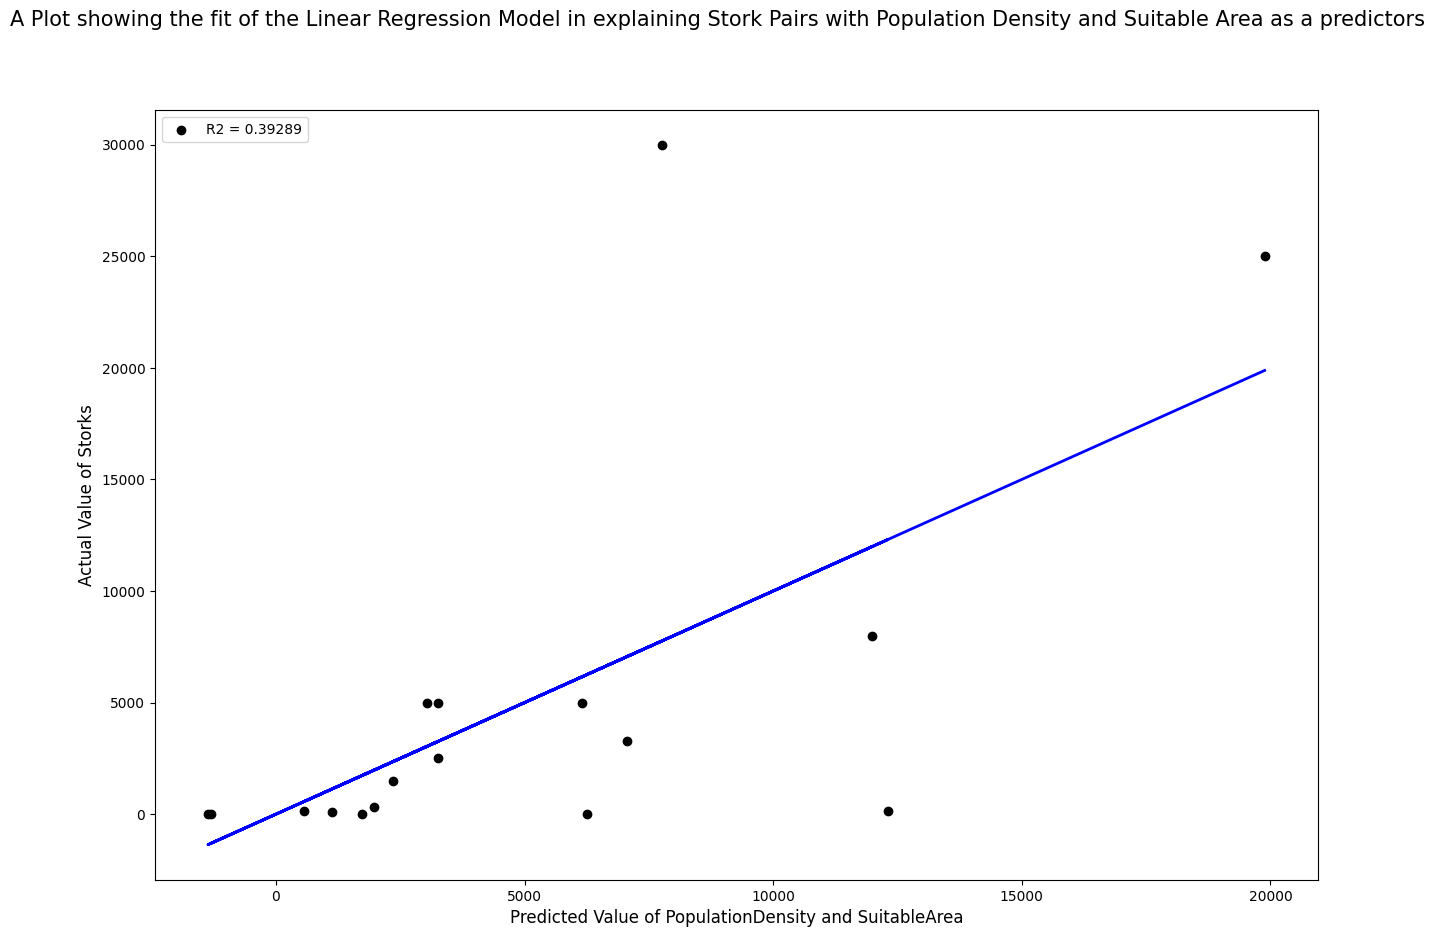

In [212]:
y_stork = storks.Storks
x_populationarea = np.column_stack((storks.PopulationDensity, storks.SuitableArea))
reg_populationarea = LinearRegression().fit(x_populationarea, y_stork)
y_hat_populationarea = reg_populationarea.predict(x_populationarea)

r2_populationarea= reg_populationarea.score(x_populationarea, y_stork).round(5)
coef_PopulationDensity, coef_SuitableArea = reg_populationarea.coef_.round(5)
print(f"The R2 value of the Linear Regression Model is {r2_area}")
print(f"The beta coefficients for this Regression Model are {coef_PopulationDensity} for Population Density and {coef_SuitableArea} for Suitable Area")


fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_hat_populationarea, y_stork,  color='black', label = f"R2 = {r2_populationarea}")
a.plot(y_hat_populationarea, y_hat_populationarea, color='blue', linewidth=2)

a.legend(loc = "upper left")
a.set_xlabel('Predicted Value of PopulationDensity and SuitableArea', size = 12)
a.set_ylabel('Actual Value of Storks', size = 12)
fig.suptitle("A Plot showing the fit of the Linear Regression Model in explaining Stork Pairs with Population Density and Suitable Area as predictors", size = 15)


### 2.1.2. Linear Regression Model that predicts the number of Storks, with PopulationDensity and SuitableArea as predictors

The figure shows the fit of the linear regression model in predicting the number of Storks, with PopulationDensity and SuitableArea as predictors. The blue line shows how well the model is fitted; the closer the points are to the blue line, the better the predictors (PopulationDensity and SuitableArea) are at predicting the number of Storks. The figure shows that a half of the datapoints are close to the blue line, while half are spread away from it. In conjunction with the R2 value of 0.39, one can conclude that this regression model that uses PopulationDensity and SuitableArea as predictors are not the best for predicting the number of Storks in each country. That said, it is slightly better than the previous model that used solely the Area of each country to predict the number of Storks.

## 2.2. Bootstrapping to estimate the difference in Root Mean Squared (RMSE) between the predicted and actual values of the two Linear Regression Models

This section uses a bootstrap function to resample the data and remodel the previous two Linear Regression Models. In doing so, the data is fitted over and over again generating various models with different predicted and actual values. A difference of the RMSE values for both models is computed and shown below - this is also displayed as a histogram. Lastly, appropriate confidence intervals are chosen to explain whether one model may be better than the other in predicting the number of Storks.

     Difference in the RMSE values for the predicted and actual values for both models
0                                          -434.819072                                
1                                          -444.458634                                
2                                          -202.648973                                
3                                          -248.660919                                
4                                          -223.013114                                
..                                                 ...                                
495                                        -271.903106                                
496                                        -189.212404                                
497                                        -132.058668                                
498                                        -132.487189                                
499                                        

Text(0, 0.5, 'Frequency of distribution')

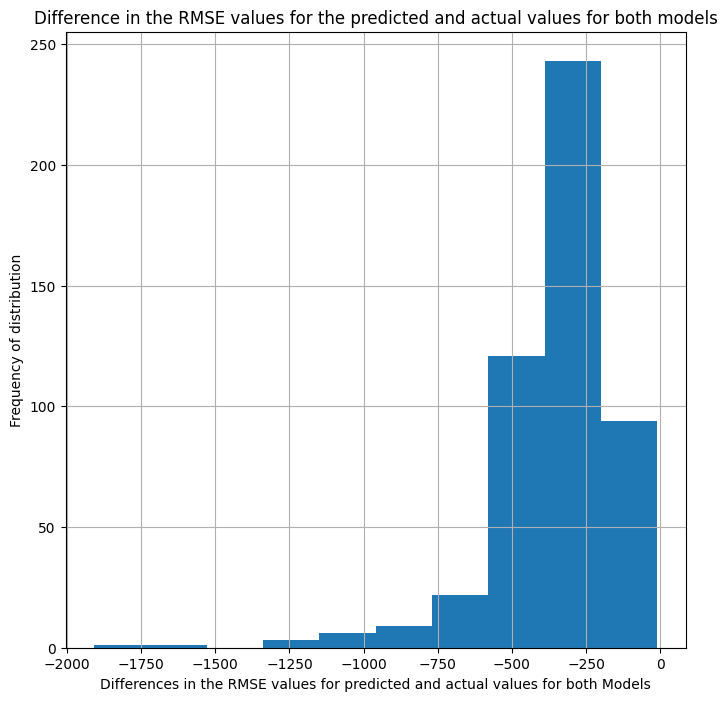

In [235]:
def doRegression(storks):
    y_stork = storks.Storks
    x_area = np.column_stack(storks.Area).reshape(-1,1)
    reg_area = LinearRegression().fit(x_area, y_stork)
    y_hat_area = reg_area.predict(x_area)
    rmse_area = sqrt(mean_squared_error(y_stork, y_hat_area))


    y_stork = storks.Storks
    x_populationarea = np.column_stack((storks.PopulationDensity, storks.SuitableArea))
    reg_area = LinearRegression().fit(x_populationarea, y_stork)
    y_hat_populationarea = reg_area.predict(x_populationarea)
    rmse_populationarea = sqrt(mean_squared_error(y_stork, y_hat_populationarea))

    diff = rmse_populationarea - rmse_area
    return diff

new_difference = doRegression(storks)
bstrap = bootstrapC(storks, ["Difference in the RMSE values for the predicted and actual values for both models"], 500, doRegression)
print(bstrap)
_ = bstrap.hist(figsize=(8,8))
plt.xlabel("Differences in the RMSE values for predicted and actual values for both Models")
plt.ylabel("Frequency of distribution")

In [237]:
print("The difference in RMSE values of both models is %4.1f, with 90%% CI from %4.1f to %4.1f" %
      (new_difference, bstrap["Difference in the RMSE values for the predicted and actual values for both models"].quantile(0.05), bstrap["Difference in the RMSE values for the predicted and actual values for both models"].quantile(0.95)))
print("The difference in RMSE values for both models is %4.1f, with 95%% CI from %4.1f to %4.1f" %
      (new_difference, bstrap["Difference in the RMSE values for the predicted and actual values for both models"].quantile(0.025), bstrap["Difference in the RMSE values for the predicted and actual values for both models"].quantile(0.975)))
print("The difference in RMSE values for both models is %4.1f, with 100%% CI from %4.1f to %4.1f" %
      (new_difference, bstrap["Difference in the RMSE values for the predicted and actual values for both models"].quantile(0), bstrap["Difference in the RMSE values for the predicted and actual values for both models"].quantile(1.0)))

The difference in RMSE values of both models is -307.7, with 90% CI from -681.8 to -115.3
The difference in RMSE values for both models is -307.7, with 95% CI from -937.3 to -81.7
The difference in RMSE values for both models is -307.7, with 100% CI from -1909.3 to -9.6


### 2.2.1. Confidence in Models in predicting the Number of Storks

Listed above are the different confidence intervals at which the difference in RMSE values for the predicted and actual values of both models. After resampling several times, we can be certain that at 100% Confidence Intervals, the RMSE difference is fully negative, which indicates that the first model (that involves Population Density and Suitable Area as predictors) will have a really low value in order for the difference to be negative all the time. This is of significance as lower values of RMSE indicate better fit, and therefore the first model may be much better at predicting the number of storks than the second model that uses just Area as a predictor.